In [1]:
import numpy as np
import pandas as pd

In [2]:
%time df = pd.read_csv("data/train/landmarks.csv", sep="\t")

CPU times: user 1min 3s, sys: 15.4 s, total: 1min 19s
Wall time: 1min 21s


In [3]:
df.shape

(393930, 1943)

In [31]:
N_ROWS = df.shape[0]
TRAIN_FRAC = 0.8
exact_n_train_rows = int(TRAIN_FRAC * N_ROWS)
exact_n_val_rows = N_ROWS - exact_n_train_rows

print(f"n_rows: {N_ROWS}")
print(f"train frac: {TRAIN_FRAC}\n")
print(f"Exact n_train_rows: {exact_n_train_rows}")
print(f"Exact n_val_rows: {exact_n_val_rows}\n")

train_indices = set()
val_indices = set()

for i in range(N_ROWS):
    if np.random.rand() < TRAIN_FRAC:
        train_indices.add(i)
    else:
        val_indices.add(i)

print(f"Used n_train_rows: {len(train_indices)}")
print(f"Used n_val_rows: {len(val_indices)}")

assert not (train_indices & val_indices)
assert sorted(train_indices | val_indices) == list(range(N_ROWS))

n_rows: 393930
train frac: 0.8

Exact n_train_rows: 315144
Exact n_val_rows: 78786

Used n_train_rows: 315377
Used n_val_rows: 78553


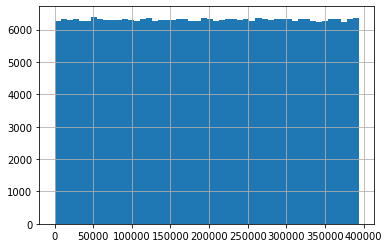

In [32]:
pd.Series(list(train_indices)).hist(bins=50)

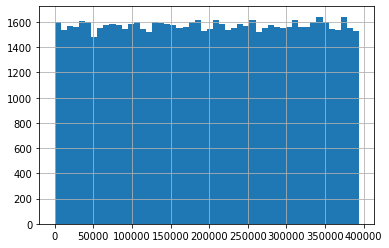

In [33]:
pd.Series(list(val_indices)).hist(bins=50)

In [34]:
with open("train_indices.txt", "w") as train_file:
    train_file.write(",".join(map(str, train_indices)))

with open("val_indices.txt", "w") as val_file:
    val_file.write(",".join(map(str, val_indices)))

In [35]:
with open("train_indices.txt", "r") as train_file:
    train_indices_new = train_file.read().split(",")
    train_indices_new = set(map(int, train_indices_new))
    assert train_indices_new == train_indices

with open("val_indices.txt", "r") as val_file:
    val_indices_new = val_file.read().split(",")
    val_indices_new = set(map(int, val_indices_new))
    assert val_indices_new == val_indices